In [1]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt -O /home/shankar/Desktop/algorithms/ML_algorithms/datasets/irish-lyrics-eof.txt

--2021-03-05 11:51:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.67.48, 142.250.76.80, 172.217.167.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.67.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/home/shankar/Desktop/algorithms/ML_algorithms/datasets/irish-lyrics-eof.txt’

/home/shankar/Deskt 100%[===================>]  67.35K  --.-KB/s    in 0.04s   

2021-03-05 11:51:06 (1.75 MB/s) - ‘/home/shankar/Desktop/algorithms/ML_algorithms/datasets/irish-lyrics-eof.txt’ saved [68970/68970]



In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Bidirectional,Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
tokenizer=Tokenizer()
pwd=os.getcwd()

In [15]:
path=os.path.join(pwd,'datasets','irish-lyrics-eof.txt')
with open(path) as f:
    data=f.read()
corpus=data.lower().split('\n')

In [16]:
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1

In [17]:
input_=[]
for line in corpus:
    curr=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(curr)+1):
        seq=curr[:i+1]
        input_.append(seq)
max_sequence_len=max([len(x) for x in input_])
input_=np.array(pad_sequences(sequences=input_,maxlen=max_sequence_len,padding='pre'))
X,y=input_[:,:-1],input_[:,-1]
y=tf.keras.utils.to_categorical(y,num_classes=total_words)

In [20]:
from tensorflow.keras.layers import Embedding
model=Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           269000    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [21]:
history=model.fit(X,y,epochs=100,verbose=2)

Epoch 1/100
430/430 - 22s - loss: 6.6670 - accuracy: 0.0691
Epoch 2/100
430/430 - 19s - loss: 5.4673 - accuracy: 0.1397
Epoch 3/100
430/430 - 18s - loss: 4.1979 - accuracy: 0.2488
Epoch 4/100
430/430 - 18s - loss: 3.2106 - accuracy: 0.3554
Epoch 5/100
430/430 - 18s - loss: 2.4992 - accuracy: 0.4622
Epoch 6/100
430/430 - 18s - loss: 1.9435 - accuracy: 0.5610
Epoch 7/100
430/430 - 18s - loss: 1.6134 - accuracy: 0.6238
Epoch 8/100
430/430 - 18s - loss: 1.3840 - accuracy: 0.6731
Epoch 9/100
430/430 - 18s - loss: 1.2280 - accuracy: 0.7031
Epoch 10/100
430/430 - 18s - loss: 1.1506 - accuracy: 0.7202
Epoch 11/100
430/430 - 18s - loss: 1.0949 - accuracy: 0.7278
Epoch 12/100
430/430 - 19s - loss: 1.0755 - accuracy: 0.7298
Epoch 13/100
430/430 - 18s - loss: 1.1166 - accuracy: 0.7157
Epoch 14/100
430/430 - 18s - loss: 1.1438 - accuracy: 0.7107
Epoch 15/100
430/430 - 18s - loss: 1.0389 - accuracy: 0.7359
Epoch 16/100
430/430 - 16s - loss: 0.9059 - accuracy: 0.7688
Epoch 17/100
430/430 - 15s - loss

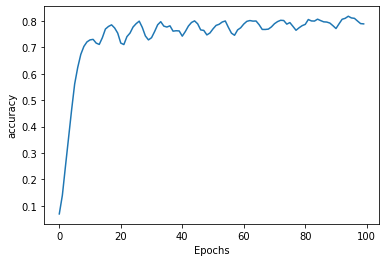

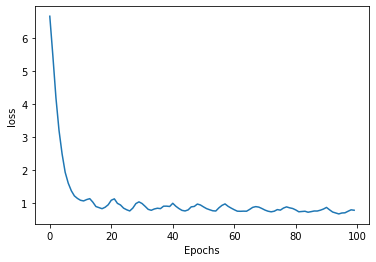

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_plot(history,string):
    plt.plot(history.history[string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show()
show_plot(history=history,string='accuracy')
show_plot(history=history,string='loss')

In [26]:
seed_text='I went to'
num_words=100
for _ in range(num_words):
    txt=tokenizer.texts_to_sequences([seed_text])[0]
    txt=pad_sequences([txt],maxlen=max_sequence_len-1,padding='pre')
    predicted=np.argmax(model.predict(txt))
    next_word=''
    for word,index in tokenizer.word_index.items():
        if index==predicted:
            next_word=word
            break
    seed_text=seed_text+' '+next_word
print(seed_text)

I went to an ale house i used to frequent mine now this now sinking if and name ones gave alive little kicked town right hapless here here here love your eyes wonderful way wid gone tree to tree my eyes ould your eyes eyes more love name he was merry sinking well well i name right ill love love and bravry eyes i eyes five gone and i love lies i love i eyes eyes i love you love claim gone eyes name hes i eyes five love love love love the as our town of love the love gone and i
